In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from data_prep import *

In [2]:
used_cars = process_raw_data(pd.read_csv('vehicles.csv'))

0. === Copying Data : (539759, 25)
1. === Drop Columns : (539759, 24)
2. === Filling Nulls : (539759, 24)
   2.1 === id
   2.2 === url
   2.3 === region
   2.4 === region_url
   2.5 === price
   2.6 === year
   2.7 === manufacturer
   2.8 === model
   2.9 === condition
   2.10 === cylinders
   2.11 === fuel
   2.12 === odometer
   2.13 === title_status
   2.14 === transmission
   2.15 === vin
   2.16 === drive
   2.17 === size
   2.18 === type
   2.19 === paint_color
   2.20 === image_url
   2.21 === description
   2.22 === state
   2.23 === lat
   2.24 === long
3. === Calculate Age : (539759, 25)
4. === Removing price Outliers : (491501, 25)
4. === Removing car_age Outliers : (485892, 25)
4. === Removing odometer Outliers : (485208, 25)
8. === Binning car_age : (485208, 26)
8. === Binning odometer : (485208, 27)
   === CCLean


In [3]:
odo_scaler = MinMaxScaler()
age_scaler = MinMaxScaler()

In [4]:
ohe_cols = pd.get_dummies(used_cars[['condition','fuel','manufacturer','transmission','drive','type','state']])
user_cars_ohe = pd.concat([used_cars,ohe_cols],axis=1)
del ohe_cols
#del used_cars
user_cars_ohe.drop(cat_columns,inplace=True,axis=1)
used_car_prices = user_cars_ohe['price']
#user_cars_ohe['sc_odometer'] = scaler.fit_transform([user_cars_ohe['odometer']])[0]
user_cars_ohe['odometer'] = user_cars_ohe['odometer']/5000
user_cars_ohe['car_age'] = user_cars_ohe['car_age']/20
#user_cars_ohe['sc_car_age'] = scaler.fit_transform([user_cars_ohe['car_age']])[0]
user_cars_ohe.drop(['id','price'],inplace=True,axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(user_cars_ohe, used_car_prices, test_size=0.20, random_state=2198)

In [6]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

In [40]:
#xgb_params = {'learning_rate':0.1,'objective':'reg:squarederror','subsample':.9,'colsample_bytree':.7}
#data_dmatrix = xgb.DMatrix(X_train,y_train)

In [7]:
xgb_r = xgb.XGBRegressor(learning_rate=0.1,subsample=.8,colsample_bytree=.7,n_estimators=200,max_depth = 10, reg_lambda = 1,verbosity=2)

In [8]:
xgb_r.fit(X_train,y_train,early_stopping_rounds=5, eval_metric="rmse",eval_set=[(X_test, y_test)])

updater_prune.cc:89: tree pruning end, 700 extra nodes, 0 pruned nodes, max_depth=10
[103]	validation_0-rmse:5725.28809
[18:18:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 774 extra nodes, 0 pruned nodes, max_depth=10
[104]	validation_0-rmse:5721.37012
[18:18:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 508 extra nodes, 0 pruned nodes, max_depth=10
[105]	validation_0-rmse:5720.12647
[18:18:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 588 extra nodes, 0 pruned nodes, max_depth=10
[106]	validation_0-rmse:5718.14111
[18:18:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 758 extra nodes, 0 pruned nodes, max_depth=10
[107]	validation_0-rmse:5716.89502
[18:18:33] INFO: C:\Users\Administrator\workspace\xg

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8, tree_method=None,
             validate_parameters=False, verbosity=2)

In [9]:
mean_squared_error(y_train,xgb_r.predict(X_train))**.5

4851.128044959583

In [10]:
mean_squared_error(y_test,xgb_r.predict(X_test))**.5

5525.717057642031

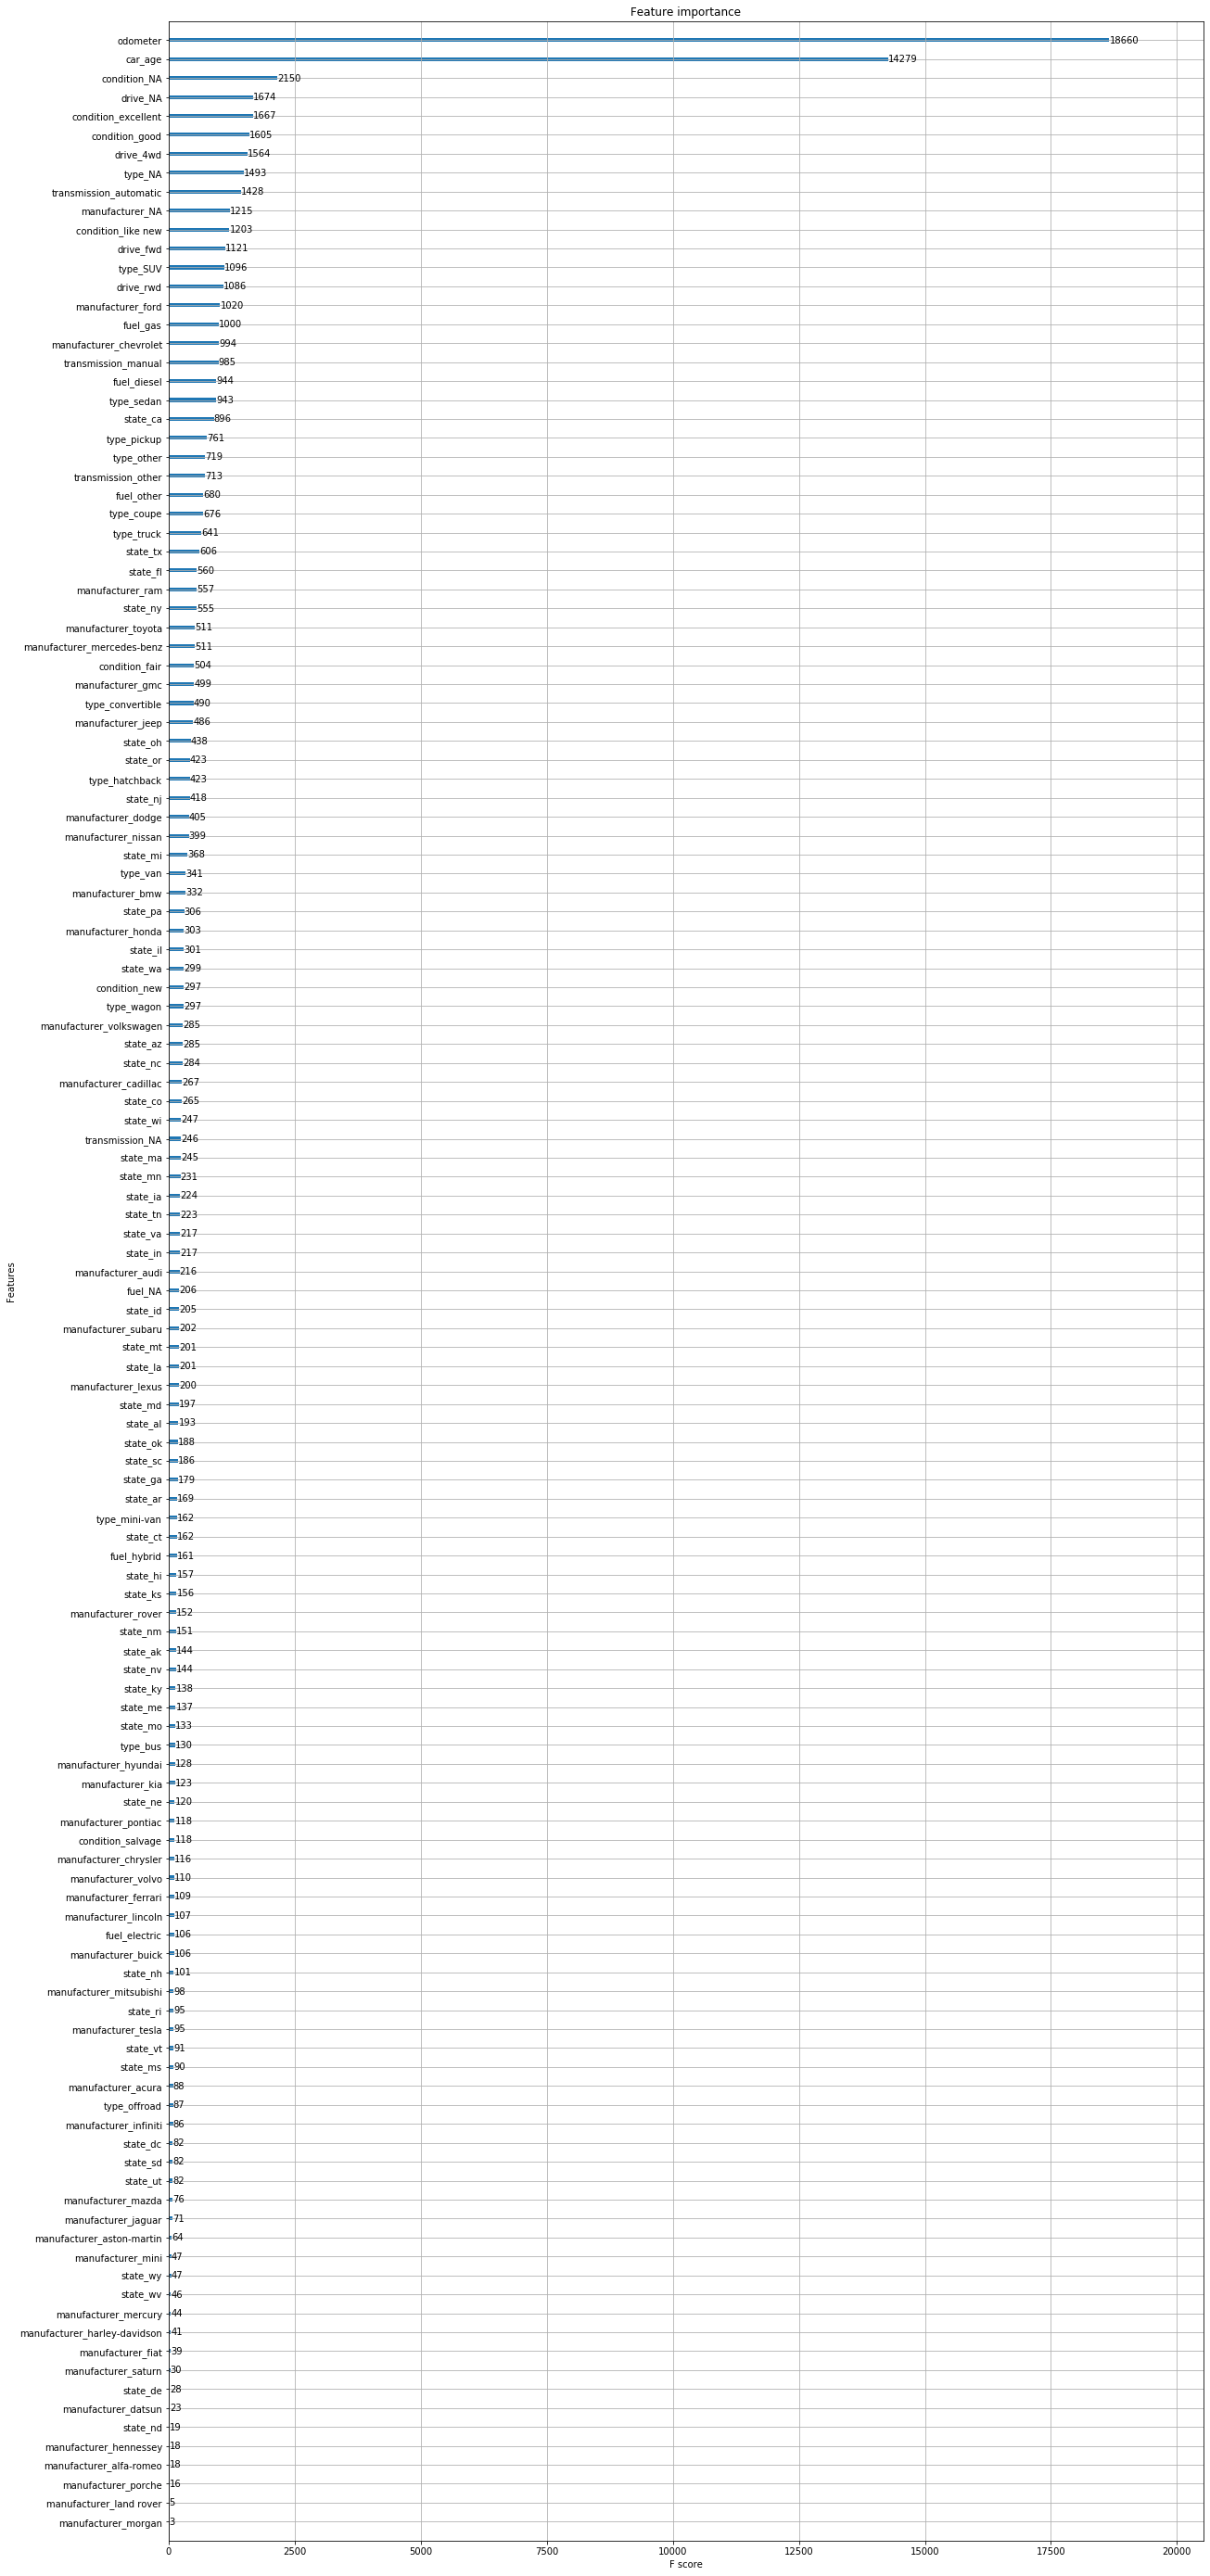

In [12]:
xgb.plot_importance(xgb_r)
plt.rcParams['figure.figsize'] = [20, 50]
plt.show()